In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices
import datetime

In [2]:
infile = "calval_regression_data_times.p"
outfile = "calval_regression_data_v2.p"
thread_infile = 'clean_5_thread_data.p'

regression_thread_data = pickle.load(open(infile, 'rb'))
clean_thread_data = pickle.load(open(thread_infile, 'rb'))


In [3]:
calibration = 0.7
calval_clean_thread_data = {}
for key in regression_thread_data:
    thread_calval = {}
    for type in regression_thread_data[key]:
        thread_calval[type] = (
            clean_thread_data[key][
                clean_thread_data[key].thread_id.isin(
                    regression_thread_data[key][type].thread_id
                )
            ]
        )
    calval_clean_thread_data[key] = thread_calval

In [4]:
calval_author_activity = {}

for key in calval_clean_thread_data:
    calval_author_activity[key] = {}
    for type in calval_clean_thread_data[key]:
        author_activity_df = (
            calval_clean_thread_data[key][type][['id', 'author']]
            .groupby('author').count()
            .rename(columns={'id': 'all_activity_count'})
        )
        posts = (
            calval_clean_thread_data[key][type][
            calval_clean_thread_data[key][type].thread_id==calval_clean_thread_data[key][type].id
            ]
        )
        comments = (
            calval_clean_thread_data[key][type][
            calval_clean_thread_data[key][type].thread_id!=calval_clean_thread_data[key][type].id
            ]
        )

        post_activity = (
            posts[['id', 'author']]
            .groupby('author').count()
            .rename(columns={'id': 'post_activity_count'})
        )

        comment_activity = (
            comments[['id', 'author']]
            .groupby('author').count()
            .rename(columns={'id': 'comment_activity_count'})
        )

        for activity_df in [post_activity, comment_activity]:
            author_activity_df = pd.concat(
                (author_activity_df, activity_df), axis=1
            ).fillna(value=0)
        
        calval_author_activity[key][type] = author_activity_df.astype(int)


In [15]:
pickle.dump(calval_author_activity, open('calval_author_activity.p', 'wb'))

In [75]:
calval_author_activity['politics']['calibration']

,all_activity_count,post_activity_count,comment_activity_count,activity_ratio,log_activity_ratio_plus_2
author,,,,,
000004b089d14532233ebd7d7252e77499bba8ec30eabbd0,2,0,2,1.0,NaN
00001c7e66a3ac1caad3070bfa54e3c0cc4bc3f07f975062,5,0,5,1.0,NaN
00004061d270e983965c89f6660387b4a5078df1c6f4cc8f,3,0,3,1.0,NaN
000042f8ad92d304e42dc275933a271c4c6f2f2f20750175,1,0,1,1.0,NaN
00004eab4ba0df11923cdbac114b201ade967e5728dfa11f,12,0,12,1.0,NaN
...,...,...,...,...,...
ffff6740f962ba671fa36c729ea79b6d5cc45af65a3bf9f7,2,0,2,1.0,NaN
ffffb73a107fd67db48328b2f17e2368125fb22dd2706b8d,3,0,3,1.0,NaN
ffffb9fb31f780bd61419e2ed16b21a44f121ac8bcddf95f,40,0,40,1.0,NaN


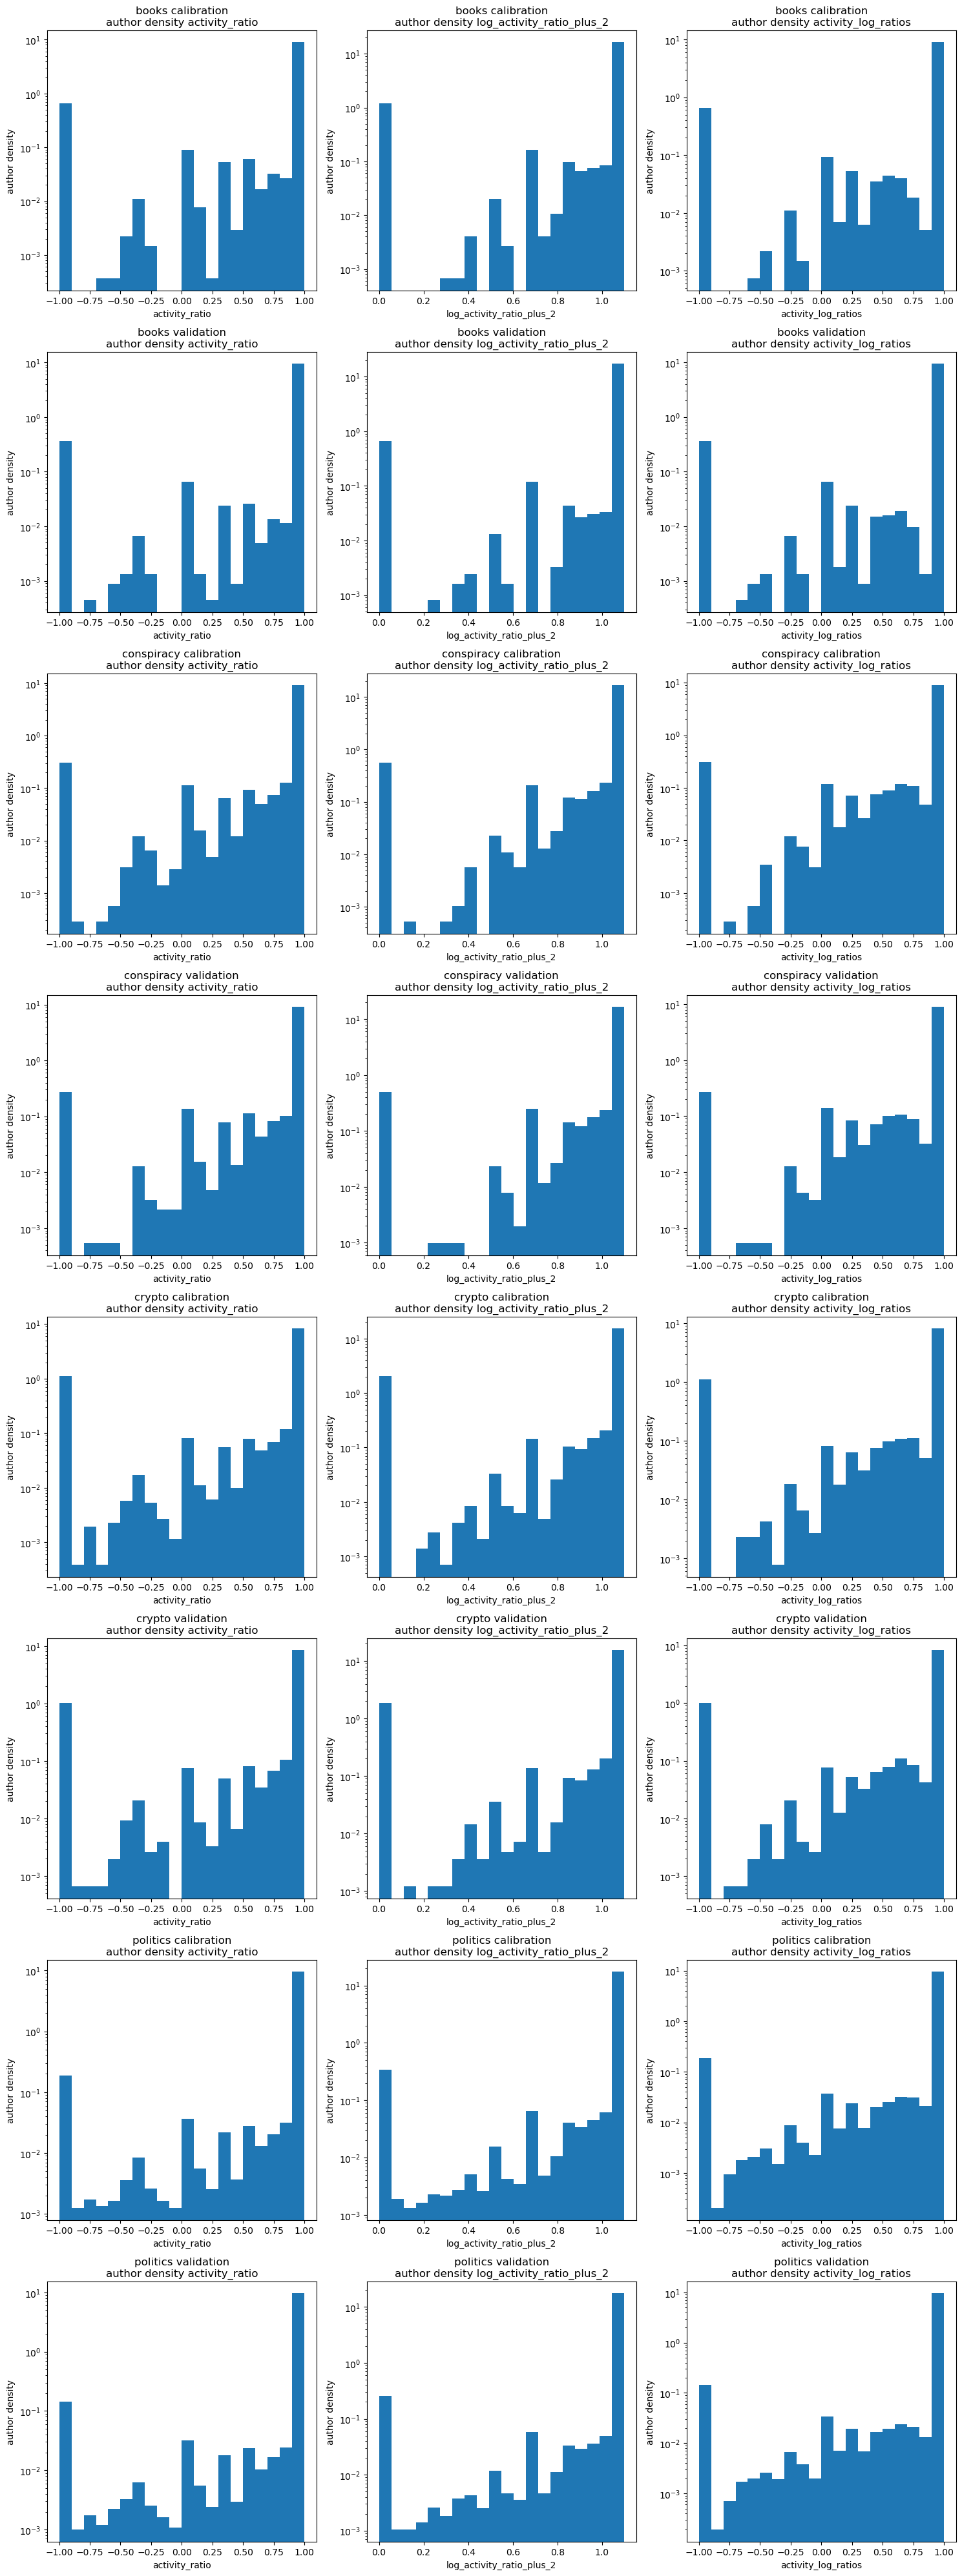

In [78]:
fig, axes = plt.subplots(8, 3, figsize=(15, 40))
i=0
for key in calval_author_activity:
    for type in calval_author_activity[key]:
        activity_counter = calval_author_activity[key][type].copy()
        calval_author_activity[key][type]['activity_ratio'] = ((
           activity_counter.comment_activity_count -
           activity_counter.post_activity_count)
           /activity_counter.all_activity_count)
        
        calval_author_activity[key][type]['log_activity_ratio_plus_2'] = np.log(
            calval_author_activity[key][type]['activity_ratio'] + 2)
        
        calval_author_activity[key][type]['activity_log_ratios'] = ((
           np.log(activity_counter.comment_activity_count + 1) -
           np.log(activity_counter.post_activity_count+1))
           /np.log(activity_counter.all_activity_count+1))

        for j, col in enumerate(['activity_ratio', 'log_activity_ratio_plus_2', 'activity_log_ratios']):
            axes[i, j].hist(
                calval_author_activity[key][type][col],
                log=True, bins=20, density=True,
                )
            axes[i,j].set_xlabel(f'{col}')
            axes[i,j].set_ylabel(f'author density')
            axes[i,j].set_title(f"{key} {type}\nauthor density {col}")

        
        i += 1
plt.tight_layout(h_pad=1)
plt.show()



In [79]:
pickle.dump(calval_author_activity, open('calval_author_activity.p', 'wb'))

In [83]:
calval_author_activity['books']['calibration']

,all_activity_count,post_activity_count,comment_activity_count,activity_ratio,log_activity_ratio_plus_2,activity_log_ratios
author,,,,,,
000511ac31f0d22440a783da2bbf3cb03de386af36093ecd,1,0,1,1.0,1.098612,1.0
0009d70ba1e41c9c65f23024df1fa0f62735b5f038b7a3ab,2,0,2,1.0,1.098612,1.0
001285b3edeea594419428dbea50de3ca11bc29983a4e730,1,0,1,1.0,1.098612,1.0
0013fbc02ca9f2c7cd210fdeb0aac5f0f36b8805b81d636f,1,0,1,1.0,1.098612,1.0
00143e55b51d00760980a3877f0d2c218187158b24b97008,1,0,1,1.0,1.098612,1.0
...,...,...,...,...,...,...
fff9cce17d9887b09e10b5f11841e48d35898cba96881989,1,0,1,1.0,1.098612,1.0
fffa4bd6cc0aeb4681b220e1ba6c5c0caaad71ccde08c810,1,0,1,1.0,1.098612,1.0
fffc44bcaefbf99398d03852fc791bfdc4611df30910f541,1,0,1,1.0,1.098612,1.0


In [84]:
for subr in regression_thread_data:
    for calval in regression_thread_data[subr]:
        regression_thread_data[subr][calval]['activity_ratio'] = ((
            regression_thread_data[subr][calval].comment_activity_count 
            - regression_thread_data[subr][calval].post_activity_count)
            /regression_thread_data[subr][calval].all_activity_count
        )
        regression_thread_data[subr][calval]['log_plus_2_activity_ratio'] = (
            np.log(regression_thread_data[subr][calval]['activity_ratio'] + 2)
        )

In [85]:
pickle.dump(regression_thread_data, open(outfile, 'wb'))

In [87]:
regression_thread_data['books']['calibration'].columns

Index(['thread_id', 'thread_size', 'authors', 'timestamp', 'author', 'score',
       'subject_sentiment_score', 'sentiment_sign', 'sentiment_magnitude',
       'success', 'all_activity_count', 'post_activity_count',
       'comment_activity_count', 'hour', 'time', 'weekday', 'time_in_secs',
       'num_dayofweek', 'activity_ratio', 'log_plus_2_activity_ratio'],
      dtype='object')